In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

import copy

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from IPython.display import Markdown as md

df = pd.read_pickle('POST_B8_data_385k.pkl', compression='zip')

categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]

float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

int_cols = [column for column in df.columns if df.dtypes[column] == 'int']


per_hundreds_list = list()
for colname in numeric_cols:
    if colname.endswith("per_hundred"):
        per_hundreds_list.append(colname)

pd.set_option('display.max_columns', 500)

pd.set_option('display.max_rows', 50)

In [2]:

text = """ 
 <h1><center><strong> E. Time-series data </strong></center></h1>

<h3> Another data type that requires specific methods and skills for analysis is time-series data. Although the Open Food database is not a time-series database, it contains several columns with dates and times, allowing for a simple investigation. In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database. <br> <br>

    1.Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x

-axis and the months (1 to 12) on the y
-axis. The color of the heatmap should show the number of items created at each month-hour pair. <br> <br>
2.  Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x
-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis. Your output should look like the following plot. </h3>
"""

md(text)

 
 <h1><center><strong> E. Time-series data </strong></center></h1>

<h3> Another data type that requires specific methods and skills for analysis is time-series data. Although the Open Food database is not a time-series database, it contains several columns with dates and times, allowing for a simple investigation. In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database. <br> <br>

    1.Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x

-axis and the months (1 to 12) on the y
-axis. The color of the heatmap should show the number of items created at each month-hour pair. <br> <br>
2.  Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x
-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis. Your output should look like the following plot. </h3>


In [3]:
text = """ 
 <h2> <font color='grey'> first we use handy library 'arrow' to work on the date to split year, month and hour
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> first we use handy library 'arrow' to work on the date to split year, month and hour
 </font> </h2>


In [4]:
import arrow

def arrow_dating(ugly_date):
    
    arrow_object = arrow.get(ugly_date)
    
    return arrow_object

In [5]:
df['arrow_object'] = df.created_at.apply(lambda x: arrow_dating(x))

In [6]:
df['year'] = df.arrow_object.apply(lambda x: x.year)
df['month'] = df.arrow_object.apply(lambda x: x.month)
df['hour'] = df.arrow_object.apply(lambda x: x.hour)


In [7]:
df[["country","year", "month"]].head(10)

,country,year,month
0,CH,2016,6
1,CH,2016,6
2,CH,2016,6
3,CH,2016,6
4,CH,2016,6
5,CH,2016,6
6,CH,2016,6
7,CH,2016,6
8,CH,2016,6
9,CH,2016,6


In [8]:
df[["year", "month", "country",]].head(10)

,year,month,country
0,2016,6,CH
1,2016,6,CH
2,2016,6,CH
3,2016,6,CH
4,2016,6,CH
5,2016,6,CH
6,2016,6,CH
7,2016,6,CH
8,2016,6,CH
9,2016,6,CH


In [9]:
countries = df.country.unique()

print(countries)

['CH' 'FR' 'IT' 'DE' 'AT' 'UK' 'US']


In [10]:
years = df.year.unique()
months = df.month.unique()

In [11]:
print(years)
print(months)

[2016 2017 2018 2019 2020 2021]
[ 6  5  7  8  9 11 12  1  2  3  4 10]


In [12]:
years = sorted(years)
months = sorted(months)

In [13]:
print(years)
print(months)

[2016, 2017, 2018, 2019, 2020, 2021]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [14]:
years_str = [str(yr) for yr in years]

months_str = [str(mo) for mo in months]

In [15]:
text = """ 
 <h2> <font color='grey'> we use apply to work on each row: now we give the wanted format to display the date as expected
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> we use apply to work on each row: now we give the wanted format to display the date as expected
 </font> </h2>


In [16]:
df["month_year"] = df.apply(lambda x: str(x.month) + "_" + str(x.year), axis=1)

In [17]:
df["month_year_bis"] = df.apply(lambda x: str(x.month) + "-" + str(x.year), axis=1)

In [18]:
df.head()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,macros_saltfiber_sum,product_name_en,product_name_de,product_name_fr,ingredients_en,created_at,country,arrow_object,year,month,hour,month_year,month_year_bis
0,NaN,75.00,NaN,NaN,1500.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.42,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,Superior quality durum wheat PastaIngredients ...,2016-06-01T11:42:22.908Z,CH,2016-06-01T11:42:22.908000+00:00,2016,6,11,6_2016,6-2016
1,NaN,1.50,NaN,NaN,1010.0,18.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,0.50,11.00,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.00,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,Bio Milk Switzerland kitchen salt,2016-06-01T11:42:25.111Z,CH,2016-06-01T11:42:25.111000+00:00,2016,6,11,6_2016,6-2016
2,NaN,52.68,NaN,NaN,1358.3,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,0.25,3.03,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.06,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio,coffee Arabica,2016-06-01T11:42:25.900Z,CH,2016-06-01T11:42:25.900000+00:00,2016,6,11,6_2016,6-2016
3,NaN,70.40,NaN,NaN,1679.0,7.90,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,NaN,4.20,NaN,NaN,65.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.10,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolat en poudre,Powdered chocolate sugar cocoa emulsifier soy...,2016-06-01T11:42:26.184Z,CH,2016-06-01T11:42:26.184000+00:00,2016,6,11,6_2016,6-2016
4,NaN,37.00,NaN,NaN,2470.0,44.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.06,27.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.06,Naturaplan Extra Dark Chocolate 70%,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Chocolat extra noir 70%,cocoa paste Honduras raw cane sugar Paraguay...,2016-06-01T11:42:26.350Z,CH,2016-06-01T11:42:26.350000+00:00,2016,6,11,6_2016,6-2016


In [19]:
df["month_year_fix"] = df.apply(lambda x: "0" + str(x.month) + "_" + str(x.year) if x.month < 10 else str(x.month) + "_" + str(x.year), axis=1)

In [20]:
text = """ 
 <h2> <font color='grey'> we use groupby to separate datas from time and spatial dimension
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> we use groupby to separate datas from time and spatial dimension
 </font> </h2>


In [21]:
n_by_month_year = df.groupby(["year","month"])["country"].count()

n_by_month_year.head(30)

year  month
2016  5          20
      6        1082
      7        7395
      8         291
      9        5382
      11        400
      12        105
2017  1          17
      2         153
      3        1140
      4         813
      6        1487
      9         682
      10        630
      11        968
      12        532
2018  1         608
      2         320
      3        1483
      4         642
      5         592
      6        1438
      7         598
      8        4347
      9        4126
      10       1549
      11        766
      12        163
2019  1         302
      2         908
Name: country, dtype: int64

In [22]:
n_by_month_year = df.groupby(["year","month"])["country"].value_counts()

n_by_month_year.head(50)

year  month  country
2016  5      CH           20
      6      CH         1082
      7      CH         7395
      8      CH          291
      9      CH         5382
      11     CH          400
      12     CH          105
2017  1      CH           17
      2      CH          153
      3      CH         1140
      4      CH          813
      6      CH         1487
      9      CH          682
      10     CH          630
      11     CH          968
      12     CH          532
2018  1      CH          608
      2      CH          320
      3      CH         1441
             FR           29
             IT           13
      4      CH          622
             FR           10
             IT            9
             DE            1
      5      IT          402
             CH          188
             FR            2
      6      IT         1266
             CH          170
             FR            2
      7      CH          597
             FR            1
      8      DE       

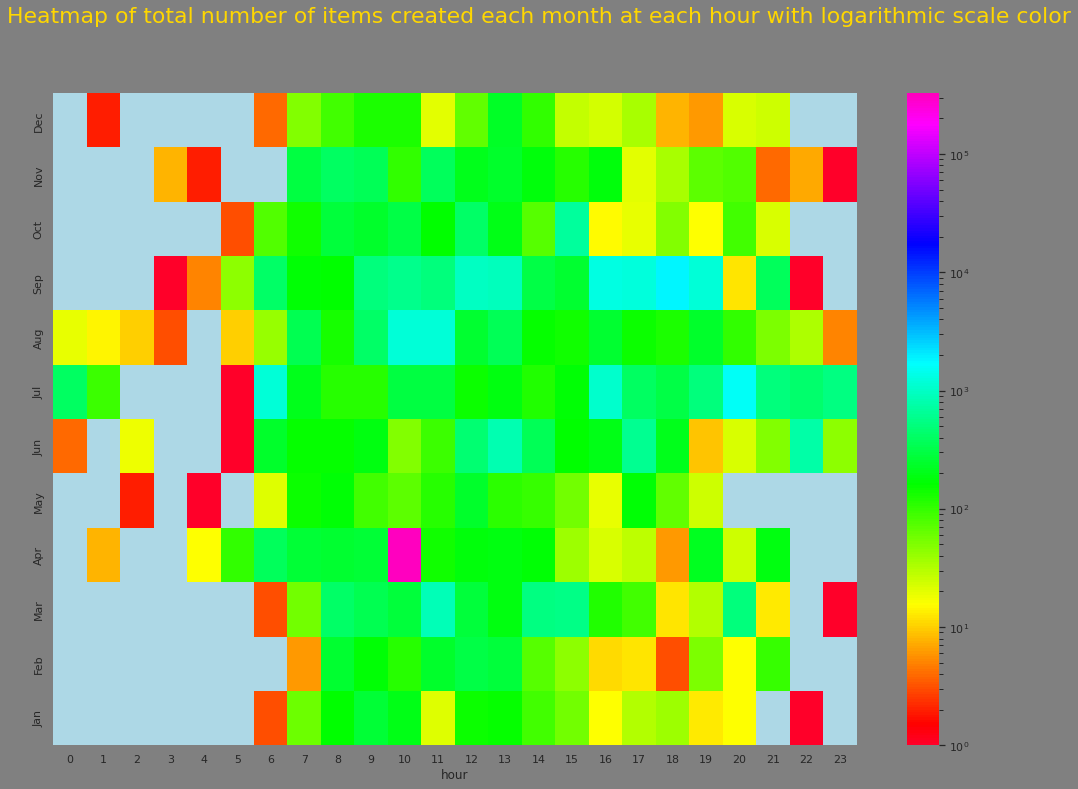

In [23]:

ct = pd.crosstab(df['hour'], df['month'])

import calendar

ct.columns = [calendar.month_abbr[month_num] for month_num in ct.columns]

transposed_ct = ct.transpose()

from matplotlib.colors import LogNorm, Normalize

sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'grey'})

fig, ax = plt.subplots(figsize=(18,12))

hm = sns.heatmap(transposed_ct, ax=ax, norm=LogNorm(), cmap='gist_rainbow')

plt.suptitle("Heatmap of total number of items created each month at each hour with logarithmic scale color",fontsize=22, color='gold', ha="center")

plt.gca().invert_yaxis()

In [24]:
md(f" <h1><center><strong> <font color='violet'> detail of total number of items created each month at each hour with logarithmic scale color </font>  </strong></center></h1>")



 <h1><center><strong> <font color='violet'> detail of total number of items created each month at each hour with logarithmic scale color </font>  </strong></center></h1>

In [25]:
print(transposed_ct)


hour   0   1   2   3   4    5     6    7    8    9       10    11   12   13  \
Jan     0   0   0   0   0    0     3   60  164  264     195    21  146  154   
Feb     0   0   0   0   0    0     0    6  251  174     113   238  301  286   
Mar     0   0   0   0   0    0     3   56  406  332     286   860  274  184   
Apr     0   8   0   0  16  105   378  261  257  264  328234   136  180  184   
May     0   0   2   0   1    0    21  148  166   91      70   113  238  107   
Jun     4   0  18   0   0    1   244  154  152  190      50    92  449  840   
Jul   397  95   0   0   0    1  1164  204  115  115     298   288  148  184   
Aug    19  14  10   3   0   10    41  334  132  414    1177  1163  257  352   
Sep     0   0   0   1   5   45   407  172  163  516     593   502  945  937   
Oct     0   0   0   0   0    3    75  139  282  239     314   160  417  202   
Nov     0   0   0   8   2    0     0  292  395  353     105   376  204  242   
Dec     0   2   0   0   0    0     4   49   87  125 

In [26]:
print(len(n_by_month_year))

112


In [27]:
n_by_month_year__index_tolist = n_by_month_year.index.tolist()

n_by_month_year__index_tolist

[(2016, 5, 'CH'),
 (2016, 6, 'CH'),
 (2016, 7, 'CH'),
 (2016, 8, 'CH'),
 (2016, 9, 'CH'),
 (2016, 11, 'CH'),
 (2016, 12, 'CH'),
 (2017, 1, 'CH'),
 (2017, 2, 'CH'),
 (2017, 3, 'CH'),
 (2017, 4, 'CH'),
 (2017, 6, 'CH'),
 (2017, 9, 'CH'),
 (2017, 10, 'CH'),
 (2017, 11, 'CH'),
 (2017, 12, 'CH'),
 (2018, 1, 'CH'),
 (2018, 2, 'CH'),
 (2018, 3, 'CH'),
 (2018, 3, 'FR'),
 (2018, 3, 'IT'),
 (2018, 4, 'CH'),
 (2018, 4, 'FR'),
 (2018, 4, 'IT'),
 (2018, 4, 'DE'),
 (2018, 5, 'IT'),
 (2018, 5, 'CH'),
 (2018, 5, 'FR'),
 (2018, 6, 'IT'),
 (2018, 6, 'CH'),
 (2018, 6, 'FR'),
 (2018, 7, 'CH'),
 (2018, 7, 'FR'),
 (2018, 8, 'DE'),
 (2018, 8, 'CH'),
 (2018, 8, 'FR'),
 (2018, 8, 'IT'),
 (2018, 9, 'DE'),
 (2018, 9, 'CH'),
 (2018, 9, 'FR'),
 (2018, 9, 'IT'),
 (2018, 10, 'DE'),
 (2018, 10, 'CH'),
 (2018, 10, 'FR'),
 (2018, 10, 'IT'),
 (2018, 10, 'AT'),
 (2018, 11, 'DE'),
 (2018, 11, 'CH'),
 (2018, 11, 'FR'),
 (2018, 11, 'IT'),
 (2018, 12, 'CH'),
 (2018, 12, 'IT'),
 (2019, 1, 'IT'),
 (2019, 1, 'CH'),
 (2019, 1, '

In [28]:
text = """ 
 <h2> <font color='grey'> from the previous step, we can make the ticks label with list comprehension and f-strings
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> from the previous step, we can make the ticks label with list comprehension and f-strings
 </font> </h2>


In [29]:
axe_X = [f"{triplet[1]} - {triplet[0]}" for triplet in n_by_month_year__index_tolist]

axe_X

['5 - 2016',
 '6 - 2016',
 '7 - 2016',
 '8 - 2016',
 '9 - 2016',
 '11 - 2016',
 '12 - 2016',
 '1 - 2017',
 '2 - 2017',
 '3 - 2017',
 '4 - 2017',
 '6 - 2017',
 '9 - 2017',
 '10 - 2017',
 '11 - 2017',
 '12 - 2017',
 '1 - 2018',
 '2 - 2018',
 '3 - 2018',
 '3 - 2018',
 '3 - 2018',
 '4 - 2018',
 '4 - 2018',
 '4 - 2018',
 '4 - 2018',
 '5 - 2018',
 '5 - 2018',
 '5 - 2018',
 '6 - 2018',
 '6 - 2018',
 '6 - 2018',
 '7 - 2018',
 '7 - 2018',
 '8 - 2018',
 '8 - 2018',
 '8 - 2018',
 '8 - 2018',
 '9 - 2018',
 '9 - 2018',
 '9 - 2018',
 '9 - 2018',
 '10 - 2018',
 '10 - 2018',
 '10 - 2018',
 '10 - 2018',
 '10 - 2018',
 '11 - 2018',
 '11 - 2018',
 '11 - 2018',
 '11 - 2018',
 '12 - 2018',
 '12 - 2018',
 '1 - 2019',
 '1 - 2019',
 '1 - 2019',
 '1 - 2019',
 '2 - 2019',
 '2 - 2019',
 '2 - 2019',
 '2 - 2019',
 '3 - 2019',
 '3 - 2019',
 '3 - 2019',
 '4 - 2019',
 '4 - 2019',
 '5 - 2019',
 '6 - 2019',
 '7 - 2019',
 '8 - 2019',
 '8 - 2019',
 '9 - 2019',
 '10 - 2019',
 '11 - 2019',
 '11 - 2019',
 '12 - 2019',
 '1 -

In [30]:
text = """ 
 <h2> <font color='grey'> the idea is the same for preparing the legend, we adapt for the different date format
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> the idea is the same for preparing the legend, we adapt for the different date format
 </font> </h2>


In [31]:
axe_X_legend = [f"{triplet[0]} - {triplet[1]}" for triplet in n_by_month_year__index_tolist]

axe_X_legend

['2016 - 5',
 '2016 - 6',
 '2016 - 7',
 '2016 - 8',
 '2016 - 9',
 '2016 - 11',
 '2016 - 12',
 '2017 - 1',
 '2017 - 2',
 '2017 - 3',
 '2017 - 4',
 '2017 - 6',
 '2017 - 9',
 '2017 - 10',
 '2017 - 11',
 '2017 - 12',
 '2018 - 1',
 '2018 - 2',
 '2018 - 3',
 '2018 - 3',
 '2018 - 3',
 '2018 - 4',
 '2018 - 4',
 '2018 - 4',
 '2018 - 4',
 '2018 - 5',
 '2018 - 5',
 '2018 - 5',
 '2018 - 6',
 '2018 - 6',
 '2018 - 6',
 '2018 - 7',
 '2018 - 7',
 '2018 - 8',
 '2018 - 8',
 '2018 - 8',
 '2018 - 8',
 '2018 - 9',
 '2018 - 9',
 '2018 - 9',
 '2018 - 9',
 '2018 - 10',
 '2018 - 10',
 '2018 - 10',
 '2018 - 10',
 '2018 - 10',
 '2018 - 11',
 '2018 - 11',
 '2018 - 11',
 '2018 - 11',
 '2018 - 12',
 '2018 - 12',
 '2019 - 1',
 '2019 - 1',
 '2019 - 1',
 '2019 - 1',
 '2019 - 2',
 '2019 - 2',
 '2019 - 2',
 '2019 - 2',
 '2019 - 3',
 '2019 - 3',
 '2019 - 3',
 '2019 - 4',
 '2019 - 4',
 '2019 - 5',
 '2019 - 6',
 '2019 - 7',
 '2019 - 8',
 '2019 - 8',
 '2019 - 9',
 '2019 - 10',
 '2019 - 11',
 '2019 - 11',
 '2019 - 12',
 '202

In [32]:
text = """ 
 <h2> <font color='grey'> we provide the corresponding country list to prepare the right color on the histogram
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> we provide the corresponding country list to prepare the right color on the histogram
 </font> </h2>


In [33]:
countries_suite = [f"{triplet[2]}" for triplet in n_by_month_year__index_tolist]

countries_suite

['CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'FR',
 'IT',
 'CH',
 'FR',
 'IT',
 'DE',
 'IT',
 'CH',
 'FR',
 'IT',
 'CH',
 'FR',
 'CH',
 'FR',
 'DE',
 'CH',
 'FR',
 'IT',
 'DE',
 'CH',
 'FR',
 'IT',
 'DE',
 'CH',
 'FR',
 'IT',
 'AT',
 'DE',
 'CH',
 'FR',
 'IT',
 'CH',
 'IT',
 'IT',
 'CH',
 'FR',
 'DE',
 'IT',
 'DE',
 'CH',
 'FR',
 'DE',
 'IT',
 'CH',
 'CH',
 'DE',
 'CH',
 'CH',
 'CH',
 'CH',
 'UK',
 'CH',
 'CH',
 'CH',
 'IT',
 'CH',
 'CH',
 'CH',
 'CH',
 'FR',
 'CH',
 'FR',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'US',
 'CH',
 'US',
 'CH',
 'FR',
 'CH',
 'FR',
 'CH',
 'FR',
 'US',
 'CH',
 'DE',
 'FR',
 'CH',
 'US',
 'CH',
 'US',
 'FR',
 'CH',
 'CH',
 'US',
 'CH',
 'FR',
 'CH']

In [34]:
text = """ 
 <h2> <font color='grey'> we provide the corresponding ammount list to prepare the right size for the bar on the histogram
 </font> </h2>
"""

md(text)

 
 <h2> <font color='grey'> we provide the corresponding ammount list to prepare the right size for the bar on the histogram
 </font> </h2>


In [35]:
n_by_month_year__vals_tolist = n_by_month_year.tolist()

n_by_month_year__vals_tolist

[20,
 1082,
 7395,
 291,
 5382,
 400,
 105,
 17,
 153,
 1140,
 813,
 1487,
 682,
 630,
 968,
 532,
 608,
 320,
 1441,
 29,
 13,
 622,
 10,
 9,
 1,
 402,
 188,
 2,
 1266,
 170,
 2,
 597,
 1,
 3302,
 1039,
 4,
 2,
 4030,
 92,
 3,
 1,
 1424,
 90,
 31,
 3,
 1,
 659,
 105,
 1,
 1,
 94,
 69,
 148,
 137,
 13,
 4,
 612,
 236,
 56,
 4,
 777,
 192,
 161,
 226,
 194,
 237,
 142,
 198,
 142,
 1,
 118,
 304,
 333,
 1,
 81,
 165,
 107,
 201,
 1,
 197,
 2,
 249,
 164,
 125,
 177,
 139,
 283,
 170,
 17,
 72,
 2,
 176,
 1,
 190,
 1,
 297,
 2,
 328221,
 406,
 12,
 1,
 275,
 21,
 247,
 25,
 2,
 262,
 217,
 3,
 365,
 8,
 35]

In [36]:
print(n_by_month_year.index[0])


(2016, 5, 'CH')


In [37]:
print(n_by_month_year.index[-1])


(2021, 10, 'CH')


In [38]:
for tpl_year_nbmonth_country in n_by_month_year.index:
    print(tpl_year_nbmonth_country)

(2016, 5, 'CH')
(2016, 6, 'CH')
(2016, 7, 'CH')
(2016, 8, 'CH')
(2016, 9, 'CH')
(2016, 11, 'CH')
(2016, 12, 'CH')
(2017, 1, 'CH')
(2017, 2, 'CH')
(2017, 3, 'CH')
(2017, 4, 'CH')
(2017, 6, 'CH')
(2017, 9, 'CH')
(2017, 10, 'CH')
(2017, 11, 'CH')
(2017, 12, 'CH')
(2018, 1, 'CH')
(2018, 2, 'CH')
(2018, 3, 'CH')
(2018, 3, 'FR')
(2018, 3, 'IT')
(2018, 4, 'CH')
(2018, 4, 'FR')
(2018, 4, 'IT')
(2018, 4, 'DE')
(2018, 5, 'IT')
(2018, 5, 'CH')
(2018, 5, 'FR')
(2018, 6, 'IT')
(2018, 6, 'CH')
(2018, 6, 'FR')
(2018, 7, 'CH')
(2018, 7, 'FR')
(2018, 8, 'DE')
(2018, 8, 'CH')
(2018, 8, 'FR')
(2018, 8, 'IT')
(2018, 9, 'DE')
(2018, 9, 'CH')
(2018, 9, 'FR')
(2018, 9, 'IT')
(2018, 10, 'DE')
(2018, 10, 'CH')
(2018, 10, 'FR')
(2018, 10, 'IT')
(2018, 10, 'AT')
(2018, 11, 'DE')
(2018, 11, 'CH')
(2018, 11, 'FR')
(2018, 11, 'IT')
(2018, 12, 'CH')
(2018, 12, 'IT')
(2019, 1, 'IT')
(2019, 1, 'CH')
(2019, 1, 'FR')
(2019, 1, 'DE')
(2019, 2, 'IT')
(2019, 2, 'DE')
(2019, 2, 'CH')
(2019, 2, 'FR')
(2019, 3, 'DE')
(2019, 3

In [39]:
#Creating two Series by passing lists

#Creating a dictionary by passing Series objects as values
frame = { 'axe_X': axe_X, 'countries_suite': countries_suite, 'n_by_month_year__vals_tolist': n_by_month_year__vals_tolist}
#Creating DataFrame by passing Dictionary
df_graph = pd.DataFrame(frame)

df_graph.set_index('axe_X')

,countries_suite,n_by_month_year__vals_tolist
axe_X,,
5 - 2016,CH,20
6 - 2016,CH,1082
7 - 2016,CH,7395
8 - 2016,CH,291
9 - 2016,CH,5382
...,...,...
8 - 2021,CH,217
8 - 2021,US,3
9 - 2021,CH,365


In [40]:
#Creating two Series by passing lists

#Creating a dictionary by passing Series objects as values
frame = { 'axe_X': axe_X,'axe_X_legend': axe_X_legend, 'countries_suite': countries_suite, 'n_by_month_year__vals_tolist': n_by_month_year__vals_tolist}
#Creating DataFrame by passing Dictionary
df_graph = pd.DataFrame(frame)
print(df_graph)

df_graph.set_index('axe_X')

         axe_X axe_X_legend countries_suite  n_by_month_year__vals_tolist
0     5 - 2016     2016 - 5              CH                            20
1     6 - 2016     2016 - 6              CH                          1082
2     7 - 2016     2016 - 7              CH                          7395
3     8 - 2016     2016 - 8              CH                           291
4     9 - 2016     2016 - 9              CH                          5382
..         ...          ...             ...                           ...
107   8 - 2021     2021 - 8              CH                           217
108   8 - 2021     2021 - 8              US                             3
109   9 - 2021     2021 - 9              CH                           365
110   9 - 2021     2021 - 9              FR                             8
111  10 - 2021    2021 - 10              CH                            35

[112 rows x 4 columns]


,axe_X_legend,countries_suite,n_by_month_year__vals_tolist
axe_X,,,
5 - 2016,2016 - 5,CH,20
6 - 2016,2016 - 6,CH,1082
7 - 2016,2016 - 7,CH,7395
8 - 2016,2016 - 8,CH,291
9 - 2016,2016 - 9,CH,5382
...,...,...,...
8 - 2021,2021 - 8,CH,217
8 - 2021,2021 - 8,US,3
9 - 2021,2021 - 9,CH,365


In [41]:
df_graph.rename(columns = {'n_by_month_year__vals_tolist':'vals'}, inplace = True)

In [42]:
for country in df.country.unique():
    df_graph[country] = np.nan


df_graph   

,axe_X,axe_X_legend,countries_suite,vals,CH,FR,IT,DE,AT,UK,US
0,5 - 2016,2016 - 5,CH,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6 - 2016,2016 - 6,CH,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7 - 2016,2016 - 7,CH,7395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8 - 2016,2016 - 8,CH,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9 - 2016,2016 - 9,CH,5382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107,8 - 2021,2021 - 8,CH,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,8 - 2021,2021 - 8,US,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,9 - 2021,2021 - 9,CH,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,9 - 2021,2021 - 9,FR,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for i, (country, val) in enumerate(zip(df_graph.countries_suite.tolist(), df_graph.vals.tolist())):
    print(i, country, val)
    
    
    df_graph.at[i, country] = val

0 CH 20
1 CH 1082
2 CH 7395
3 CH 291
4 CH 5382
5 CH 400
6 CH 105
7 CH 17
8 CH 153
9 CH 1140
10 CH 813
11 CH 1487
12 CH 682
13 CH 630
14 CH 968
15 CH 532
16 CH 608
17 CH 320
18 CH 1441
19 FR 29
20 IT 13
21 CH 622
22 FR 10
23 IT 9
24 DE 1
25 IT 402
26 CH 188
27 FR 2
28 IT 1266
29 CH 170
30 FR 2
31 CH 597
32 FR 1
33 DE 3302
34 CH 1039
35 FR 4
36 IT 2
37 DE 4030
38 CH 92
39 FR 3
40 IT 1
41 DE 1424
42 CH 90
43 FR 31
44 IT 3
45 AT 1
46 DE 659
47 CH 105
48 FR 1
49 IT 1
50 CH 94
51 IT 69
52 IT 148
53 CH 137
54 FR 13
55 DE 4
56 IT 612
57 DE 236
58 CH 56
59 FR 4
60 DE 777
61 IT 192
62 CH 161
63 CH 226
64 DE 194
65 CH 237
66 CH 142
67 CH 198
68 CH 142
69 UK 1
70 CH 118
71 CH 304
72 CH 333
73 IT 1
74 CH 81
75 CH 165
76 CH 107
77 CH 201
78 FR 1
79 CH 197
80 FR 2
81 CH 249
82 CH 164
83 CH 125
84 CH 177
85 CH 139
86 CH 283
87 CH 170
88 US 17
89 CH 72
90 US 2
91 CH 176
92 FR 1
93 CH 190
94 FR 1
95 CH 297
96 FR 2
97 US 328221
98 CH 406
99 DE 12
100 FR 1
101 CH 275
102 US 21
103 CH 247
104 US 25
105 FR 

In [44]:
#df_graph.head(30) # uncomment to have a look if need

Following the given example as enounced, we do not display United Kingdom and Austria , no transparency, no rotation for x-ticks labels,
------------------------------------------------------------------------------------------------------------------------------------------
and we respect the given color chart.
-------------------------------------

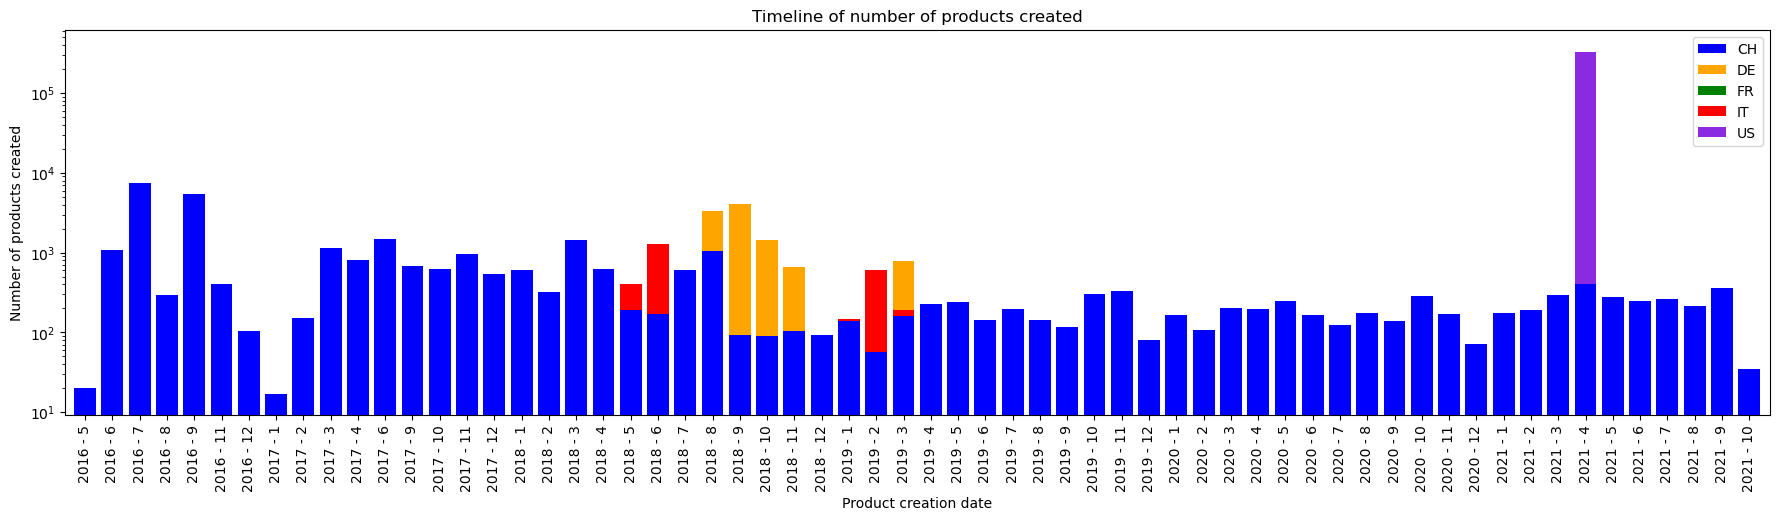

In [45]:
plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=(22, 5)) 

alpha_val = 1.0

chcolor = 'blue'
decolor = 'orange'
frcolor = 'green'
itcolor = 'red'
#uscolor = 'purple'
#uscolor = 'magenta'
#uscolor = 'pink'
uscolor = 'blueviolet'

#plt.bar(df_graph["axe_X"],df_graph.CH, label = 'CH', color = chcolor) # american superposition value exceed and overlap CH

plt.bar(df_graph["axe_X_legend"],df_graph.DE, label = 'DE', alpha= alpha_val, color = decolor)

plt.bar(df_graph["axe_X_legend"],df_graph.FR, label = 'FR', alpha= alpha_val, color = frcolor)

plt.bar(df_graph["axe_X_legend"],df_graph.IT, label = 'IT', alpha= alpha_val, color = itcolor)

plt.bar(df_graph["axe_X_legend"],df_graph.US, label = 'US', alpha= alpha_val, color = uscolor) # american superposition value exceed and overlap CH
plt.bar(df_graph["axe_X_legend"],df_graph.CH, label = 'CH', color = chcolor) # american superposition value exceed and overlap CH

# FINISHING ----------------------------------------------------------------------------------
plt.title("Timeline of number of products created")

plt.xlabel("Product creation date")
plt.xticks(rotation=90)
plt.xlim('2016 - 5','2021 - 10')

plt.ylabel("Number of products created")
plt.yscale("log")
plt.ylim(10)
# LEGEND ------------------------------------------------------------------------------------
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [4,0,1,2,3]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right') 

plot_margin = 0.75

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.show() 